##Understanding the Data

In [ ]:
#importing the required libraries
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils


In [ ]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Analyzing the data

#Understanding the Data

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

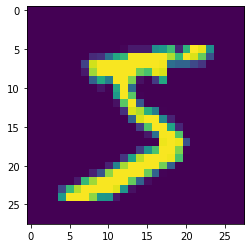

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

##Reshaping the data

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

##Apply one-Hot Encoding

In [ ]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test,  number_of_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

###Model Building

## Add CNN Layers


In [ ]:
#Creating the Model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation = 'softmax'))

##compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
number_of_classes = 10

##Train the model

In [ ]:
#Fitting the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=12, batch_size=128 )

Epoch 1/12
469/469 [==============================] - 187s 399ms/step - loss: 0.3945 - accuracy: 0.9450 - val_loss: 0.0772 - val_accuracy: 0.9768
Epoch 2/12
469/469 [==============================] - 220s 469ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.0947 - val_accuracy: 0.9737
Epoch 3/12
469/469 [==============================] - 213s 455ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.1030 - val_accuracy: 0.9766
Epoch 4/12
469/469 [==============================] - 208s 443ms/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.0977 - val_accuracy: 0.9768
Epoch 5/12
469/469 [==============================] - 237s 504ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.1103 - val_accuracy: 0.9753
Epoch 6/12
469/469 [==============================] - 170s 362ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.1267 - val_accuracy: 0.9770
Epoch 7/12
469/469 [==============================] - 168s 358ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.1239 -

##Observing the metrics

In [ ]:
metrics =model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Acurracy):")
print(metrics)

Metrics(Test loss & Test Acurracy):
[0.14481091499328613, 0.9771999716758728]


###Test the Model

##Predicting the output

In [ ]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 23ms/step
[[9.6609507e-17 1.6706395e-30 1.1514326e-14 6.2211914e-14 2.1789413e-30
  9.8262021e-24 4.1186576e-30 1.0000000e+00 9.9287471e-20 3.6865574e-19]
 [2.6650833e-24 1.2571344e-25 1.0000000e+00 3.8322025e-25 6.0288331e-32
  1.7170357e-31 2.1468791e-15 6.8599688e-34 6.6149775e-21 3.5742554e-32]
 [6.0631769e-12 9.9999774e-01 2.6093470e-12 1.9750187e-15 1.9481078e-11
  1.8802774e-12 1.2282828e-12 2.5202282e-13 2.2576423e-06 4.3454872e-13]
 [1.0000000e+00 3.2207890e-26 9.8987043e-12 2.5465012e-20 1.3112296e-23
  3.9773871e-18 1.9132972e-12 1.3219097e-19 3.5936968e-17 2.9064331e-12]]


In [ ]:

print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


##Save The model

In [ ]:
model.save('models/mnistCNN.h5')

##Test With saved model

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model('mnistCNN.h5')
img = image.load_img('9.png',target_size=(28,28),grayscale=True)
img = image.img_to_array(img)
print(img.shape)
x = np.expand_dims(img,axis=0)
print(x.shape)
print('*'*20)
print(model.predict(x))
print('*'*20)
print(np.round_(model.predict(x)))

(28, 28, 1)
(1, 28, 28, 1)
********************
1/1 [==============================] - 0s 54ms/step
[[2.0730141e-01 4.4900822e-04 1.4002007e-01 6.4989376e-01 1.3808086e-09
  4.6116722e-04 1.0275489e-05 2.1104751e-09 1.8321988e-03 3.2233369e-05]]
********************
1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
